In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks

In [2]:
parkinsons_dataset=pd.read_csv("../DataSets/parkinsons.csv")

In [3]:
parkinsons_dataset.shape

(195, 24)

In [5]:
x=parkinsons_dataset.drop(columns=["name", "status"]) 
y=parkinsons_dataset["status"]

In [6]:
from imblearn.under_sampling import TomekLinks

In [ ]:
# 3️⃣ Apply Tomek Links Undersampling
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(x,y)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:

# 4️⃣ Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)


In [10]:
# 5️⃣ Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model1=svm.SVC(kernel='linear')

In [12]:
model1.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
y_pred=model1.predict(X_test)

In [14]:
# Calculate the Accuracy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 92.11%


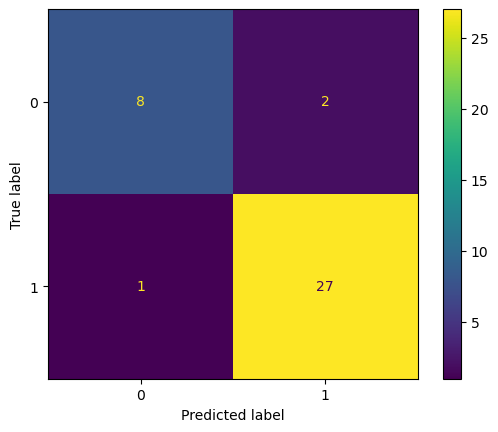

In [17]:
# calculate confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
display.plot()



In [18]:
# Precision, Recall
from sklearn.metrics import classification_report,precision_score,recall_score
print(classification_report(y_test, y_pred))

# Precision
precision=precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision*100))

# Recall
recall=recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall*100))



              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.96      0.95        28

    accuracy                           0.92        38
   macro avg       0.91      0.88      0.89        38
weighted avg       0.92      0.92      0.92        38

Precision: 93.10%
Recall: 96.43%


In [19]:
# model2 using logistic regression
from sklearn.linear_model import LogisticRegression


In [20]:
model2=LogisticRegression(
    solver='liblinear',
    random_state=42
)

In [21]:
model2.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [22]:
y_pred=model2.predict(X_test)

In [24]:
# accurecy
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 92.11%


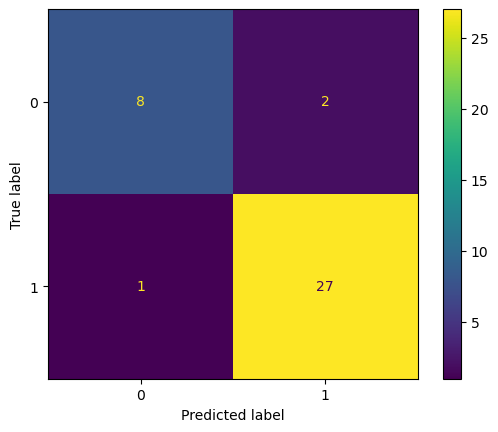

In [25]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
display.plot()

In [26]:
# Precision, Recall
print(classification_report(y_test, y_pred))

# Precision
precision=precision_score(y_test, y_pred)
print("Precision: {:.2f}%".format(precision*100))

# Recall
recall=recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall*100))



              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.96      0.95        28

    accuracy                           0.92        38
   macro avg       0.91      0.88      0.89        38
weighted avg       0.92      0.92      0.92        38

Precision: 93.10%
Recall: 96.43%


In [27]:
# model3 using descision tree
from sklearn.tree import DecisionTreeClassifier


In [28]:
model3=DecisionTreeClassifier(random_state=42)

In [29]:
model3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
y_pred=model3.predict(X_test)

In [31]:
# precison
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 89.47%


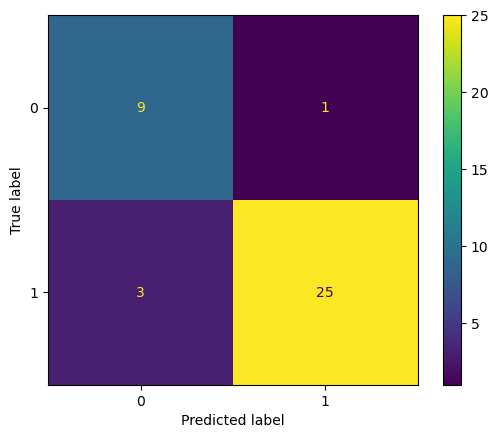

In [32]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
display.plot()

In [33]:
# Precision, Recall
print(classification_report(y_test, y_pred))

# Precision
precision=precision_score(y_test, y_pred)

print("Precision: {:.2f}%".format(precision*100))

# Recall
recall=recall_score(y_test, y_pred)
print("Recall: {:.2f}%".format(recall*100))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.96      0.89      0.93        28

    accuracy                           0.89        38
   macro avg       0.86      0.90      0.87        38
weighted avg       0.91      0.89      0.90        38

Precision: 96.15%
Recall: 89.29%


In [34]:
# saving model
import pickle
filename = 'parkinsons_model.sav'
pickle.dump(model1, open(filename, 'wb'))
